<a href="https://colab.research.google.com/github/jmolins89/final-project/blob/master/New_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing stuff...

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random
from sklearn.metrics import recall_score,f1_score,precision_score
import itertools
import pandas as pd
import keras
import tensorflow as tf
from keras.callbacks import TensorBoard
from time import time
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout
from keras.layers.advanced_activations import ReLU
from collections import Counter
from keras.models import load_model

# Defining functions...

In [0]:
def createxy(data):
    X,y=[],[]
    for features,label in data:
        X.append(features/255)
        y.append(label)
    return X,y
def createxyshuffled(data):
    X,y=[],[]
    for features,label in data:
        X.append(features)
        y.append(label)
    return X,y
  
def calculate_metrics(y_true,y_predictions):
  y_trues=np.array([np.argmax(y_true[i]) for i in range(len(y_true))])
  y_pred=np.array([y_predictions[i][np.argmax(y_predictions[i])] for i in range(len(y_predictions))])
  y_t=[np.argmax(y_true[i]) for i in range(len(y_true))]
  y_p=[np.argmax(y_predictions[i]) for i in range(len(y_predictions))]
  f1 = f1_score(y_t, y_p,average='binary')
  recall = recall_score(y_t, y_p,average='binary')
  prec=precision_score(y_t, y_p, average='binary')
  fpr, tpr, thresholds = metrics.roc_curve(y_trues, y_pred,pos_label=1)
  auc = metrics.auc(fpr, tpr)
  return f1,recall,prec,auc

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)#, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
def create_training_data(datadir,IMG_SIZE):
    '''
    '''
    lst=[]
    categories = ['NORMAL', 'PNEUMONIA']
    for category in categories:
        path = os.path.join(datadir, category)  # path to normal or pneumonia
        class_num=categories.index(category)    # Set category by index in categories: 0 -> Normal, 1 -> Pneumonia
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)   # read the original image
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) # resizes the original image to a IMG_SIZE
                lst.append([new_array,class_num])     # Appends to the list a tuple with array resized and each label
            except Exception as e:
                pass
    return lst

# Loading data ...

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
categories=['NORMAL','PNEUMONIA']
IMG_SIZE=200

training_data = create_training_data('/content/drive/My Drive/chest_xray/train',200)
test_data = create_training_data('/content/drive/My Drive/chest_xray/test',200)
validation_data = create_training_data('/content/drive/My Drive/chest_xray/val',200)

In [0]:
random.shuffle(training_data)
random.shuffle(test_data)
random.shuffle(validation_data)

In [0]:
X_train,y_train = createxy(training_data)
X_test,y_test = createxy(test_data)
X_val,y_val = createxy(validation_data)

In [0]:
X_train=np.array(X_train).reshape(-1,IMG_SIZE,IMG_SIZE,1)
X_test=np.array(X_test).reshape(-1,IMG_SIZE,IMG_SIZE,1)
X_val=np.array(X_val).reshape(-1,IMG_SIZE,IMG_SIZE,1)


# Exporting arrays with images and labels

In [0]:
import pickle

pickle_out = open('X_train_1.pickle','wb')
pickle.dump(X_train_more_data, pickle_out)
pickle_out.close()

pickle_out = open('y_train_1.pickle','wb')
pickle.dump(y_train_more_data, pickle_out)
pickle_out.close()

pickle_out = open('X_test_1.pickle','wb')
pickle.dump(X_test, pickle_out)
pickle_out.close()

pickle_out = open('y_test_1.pickle','wb')
pickle.dump(y_test, pickle_out)
pickle_out.close()

pickle_out = open('X_val_1.pickle','wb')
pickle.dump(X_val, pickle_out)
pickle_out.close()

pickle_out = open('y_val_1.pickle','wb')
pickle.dump(y_val, pickle_out)
pickle_out.close()

In [0]:
import pickle
pickle_in1=open('/content/drive/My Drive/X_train.pickle','rb')
pickle_in2=open('/content/drive/My Drive/y_train.pickle','rb')
pickle_in3=open('/content/drive/My Drive/X_test.pickle','rb')
pickle_in4=open('/content/drive/My Drive/y_test.pickle','rb')
pickle_in5=open('/content/drive/My Drive/X_val.pickle','rb')
pickle_in6=open('/content/drive/My Drive/y_val.pickle','rb')

X_train,y_train=pickle.load(pickle_in1),pickle.load(pickle_in2)
X_test,y_test=pickle.load(pickle_in3),pickle.load(pickle_in4)
X_val,y_val=pickle.load(pickle_in5),pickle.load(pickle_in6)

In [0]:
len(X_train)

5216

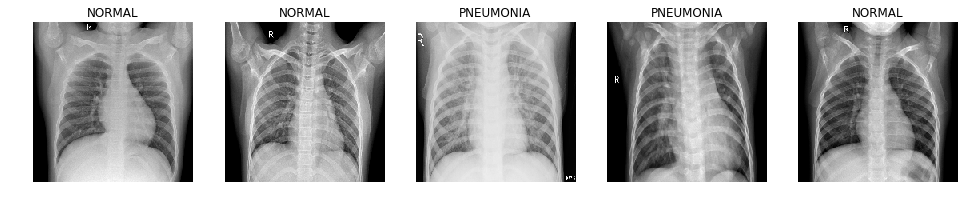

In [0]:
dic={0:'NORMAL',1:'PNEUMONIA'}
plt.figure(figsize=(20,12))
for index,img in enumerate(X_train[:5]):  
    plt.subplot(1,6,index+1)
    plt.imshow(img.reshape(200,200), cmap='gray')
    plt.axis('off')
    plt.title(dic.get(y_train[index]))
plt.show()

In the previous images **we can't distinguish the case with pneumonia against the case without pneumonia** if don't know anything about chest X-Ray reading.

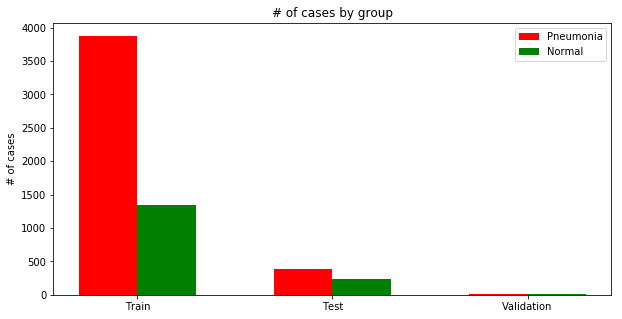

In [0]:
N = 3
normal=(y_train.count(0),y_test.count(0),y_val.count(0))
pneumonia=(y_train.count(1),y_test.count(1),y_val.count(1))
ind = np.arange(N)    # the x locations for the groups
width = 0.3       # the width of the bars: can also be len(x) sequence
plt.figure(figsize=(10,5))
p1 = plt.bar(ind-0.15, pneumonia, width,color='r')
p2 = plt.bar(ind+0.15, normal, width, color='g')
plt.ylabel('# of cases')
plt.title('# of cases by group')
plt.xticks(ind, ('Train', 'Test', 'Validation'))
plt.yticks(np.arange(0, 4500, 500))
plt.legend((p1[0], p2[0]), ('Pneumonia','Normal'))

plt.show()



In the previous graph we can observe that **the data is unbalanced**, because we have more Pneumonia cases than Normal.

We have to **rebalance** the data to train better a neural network.

We are going to **generate random images of Normal cases**.



In [20]:
np.bincount(y_train)

array([1341, 3875])

In [0]:
print('{} normal cases to create for train data'.format(np.bincount(y_train)[1]-np.bincount(y_train)[0]))

2534 normal cases to create for train data


## **Creando generador imágenes**

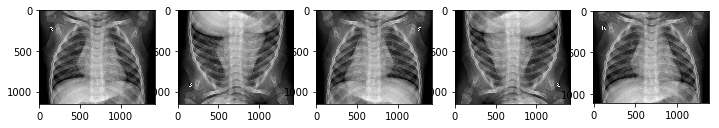

In [0]:
from google.colab.patches import cv2_imshow
imageSource = '/content/drive/My Drive/chest_xray/train/NORMAL/IM-0117-0001.jpeg'
img = cv2.imread(imageSource)
 
# copy image to display all 4 variations
horizontal_img = img.copy()
vertical_img = img.copy()
both_img = img.copy()
 
# flip img horizontally, vertically,
# and both axes with flip()
horizontal_img = cv2.flip( img, 0 )
vertical_img = cv2.flip( img, 1 )
both_img = cv2.flip( img, -1 )
 
# display the images on screen with imshow()
plt.figure(figsize=(12,4))
plt.subplot(1,5,1)
plt.imshow(img )
plt.subplot(1,5,2)
plt.imshow(horizontal_img )
plt.subplot(1,5,3)
plt.imshow(vertical_img )
plt.subplot(1,5,4)
plt.imshow( both_img )
plt.subplot(1,5,5)
plt.imshow(img[20:-20,20:-20] )
 
# wait time in milliseconds
# this is required to show the image
# 0 = wait indefinitely
cv2.waitKey(0)
 
# close the windows
cv2.destroyAllWindows()

In [0]:
normalindex=[i for i,e in enumerate(y_train) if e==0 ]
new_images=[]
new_labels=[]
for imagen in X_train[normalindex]:
  new_img = imagen[20:-20,20:-20].copy()
  new_img = cv2.resize(new_img,(200,200))
  new_images.append(new_img)
  new_labels.append(0)
  cv2.waitKey(0)

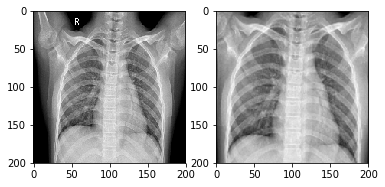

In [6]:
plt.subplot(1,2,1)
plt.imshow(X_train[normalindex][1].reshape(200,200), cmap='gray')
plt.subplot(1,2,2)
plt.imshow(new_images[1].reshape(200,200),cmap='gray')
plt.show()

In [7]:
a=X_train
b=np.array(new_images).reshape(-1,200,200,1)
c=y_train
d=np.array(new_labels)

print(len(a))
print(len(b))
X_train_more_data = np.concatenate((a,b),axis=0)
y_train_more_data = np.concatenate((c,d),axis=0)
print(len(X_train_more_data))
print(len(y_train_more_data))
np.bincount(y_train_more_data)

5216
1341
6557
6557


array([2682, 3875])

In [8]:
to_shuffle_train=[]
for i in range(len(X_train_more_data)):
  to_shuffle_train.append([X_train_more_data[i],y_train_more_data[i]])
print('len:',len(to_shuffle_train))

len: 6557


In [0]:
random.Random(42).shuffle(to_shuffle_train)

In [0]:
X_train_more_data,y_train_more_data=createxyshuffled(to_shuffle_train)
X_train_more_data=np.array(X_train_more_data).reshape(-1,200,200,1)

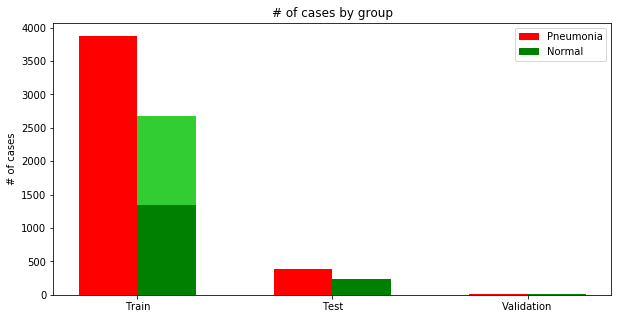

In [0]:
N = 3
normal0=(y_train.count(0),y_test.count(0),y_val.count(0))
normal=(np.bincount(y_train_more_data)[0],y_test.count(0),y_val.count(0))
pneumonia=(np.bincount(y_train_more_data)[1],y_test.count(1),y_val.count(1))
ind = np.arange(N)    # the x locations for the groups
width = 0.3       # the width of the bars: can also be len(x) sequence
plt.figure(figsize=(10,5))
p1 = plt.bar(ind-0.15, pneumonia, width,color='r')
p2 = plt.bar(ind+0.15, normal, width, color='limegreen')
p2 = plt.bar(ind+0.15, normal0, width, color='g')
plt.ylabel('# of cases')
plt.title('# of cases by group')
plt.xticks(ind, ('Train', 'Test', 'Validation'))
plt.yticks(np.arange(0, 4500, 500))
plt.legend((p1[0], p2[0]), ('Pneumonia','Normal'))

plt.show()

# Convolutional Neural Network

In [0]:
from keras.utils import to_categorical
y_train_binary = to_categorical(y_train)
y_test_binary = to_categorical(y_test)
y_val_binary = to_categorical(y_val)
y_train_more_data_binary = to_categorical(y_train_more_data)

In [12]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(200, 200,1), activation='relu'))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=2, activation='softmax'))
model.summary()

W0806 08:29:41.381876 139987223156608 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0806 08:29:41.423982 139987223156608 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0806 08:29:41.431932 139987223156608 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0806 08:29:41.477687 139987223156608 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0806 08:29:41.484617 139987223156608 deprecation_wrapp

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 198, 198, 32)      320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 196, 196, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 98, 98, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 98, 98, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 96, 96, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 94, 94, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 47, 47, 64)        0         
__________

In [13]:
model.compile(
    loss='categorical_crossentropy',  # we train 2-way classification
    optimizer=keras.optimizers.Adadelta(),  # for SGD
    metrics=['accuracy'],  # report accuracy during training
)
#tensorboard = TensorBoard(log_dir="logs/{}".format(time()))
modeltrain = model.fit(x=X_train_more_data,y=y_train_more_data_binary, epochs=30,#,callbacks=[tensorboard])#,
                   validation_split=0.1, batch_size=128,shuffle=True)

W0806 08:30:21.785678 139987223156608 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0806 08:30:21.795082 139987223156608 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.

W0806 08:30:21.936231 139987223156608 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 5901 samples, validate on 656 samples
Epoch 1/30
5901/5901 [==============================] - 43s 7ms/step - loss: 0.6863 - acc: 0.5809 - val_loss: 0.6799 - val_acc: 0.5762
Epoch 2/30
5901/5901 [==============================] - 32s 5ms/step - loss: 0.6756 - acc: 0.5872 - val_loss: 0.6602 - val_acc: 0.5762
Epoch 3/30
5901/5901 [==============================] - 32s 5ms/step - loss: 0.6764 - acc: 0.5952 - val_loss: 0.6850 - val_acc: 0.5762
Epoch 4/30
5901/5901 [==============================] - 31s 5ms/step - loss: 0.6808 - acc: 0.6060 - val_loss: 0.6655 - val_acc: 0.6280
Epoch 5/30
5901/5901 [==============================] - 31s 5ms/step - loss: 0.6179 - acc: 0.6709 - val_loss: 0.5101 - val_acc: 0.8003
Epoch 6/30
5901/5901 [==============================] - 31s 5ms/step - loss: 0.4948 - acc: 0.7680 - val_loss: 0.4776 - val_acc: 0.8034
Epoch 7/30
5901/5901 [==============================] - 31s 5ms/step - loss: 0.4161 - acc: 0.8151 - val_loss: 0.3019 - val_acc: 0.8826
Epoch 8/

In [0]:
len(X_train_more_data)

6557

In [0]:
modeltrain.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

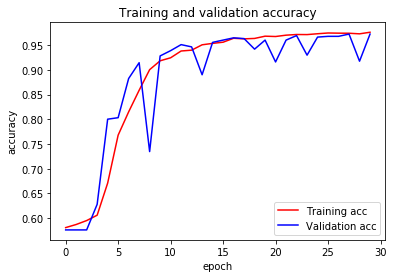

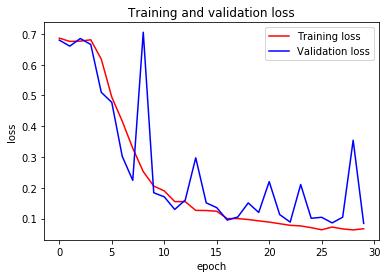

In [14]:
#Graphing our training and validation
acc = modeltrain.history['acc']
val_acc = modeltrain.history['val_acc']
loss = modeltrain.history['loss']
val_loss = modeltrain.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy') 
plt.xlabel('epoch')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss') 
plt.xlabel('epoch')
plt.legend()
plt.show()

In [15]:
val_loss,val_acc = model.evaluate(X_test,y_test_binary)
print(val_loss,val_acc)

624/624 [==============================] - 2s 3ms/step
0.6827158255454822 0.8044871794871795


In [0]:
predictions=model.predict(X_test)

In [0]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test_binary.argmax(axis=1), predictions.argmax(axis=1))


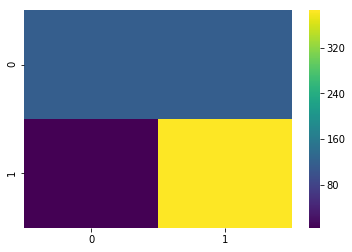

In [18]:
import seaborn as sns
sns.heatmap(matrix, cmap='viridis');

In [19]:
matrix

array([[117, 117],
       [  5, 385]])

Normalized confusion matrix


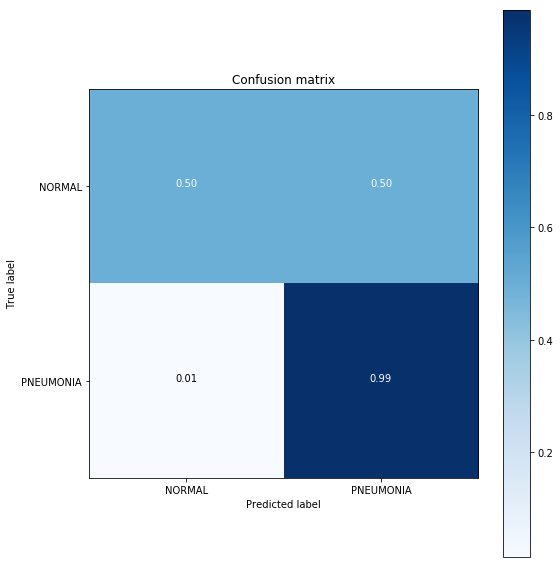

In [22]:
preds = np.argmax(model.predict(X_test), axis = 1)
cm = confusion_matrix([np.argmax(i) for i in y_test_binary],preds)
keys = ['NORMAL','PNEUMONIA']
plt.figure(figsize=(8,8))
plot_confusion_matrix(cm, keys, normalize=True)

In [129]:
from sklearn import metrics
def calculate_auc(y_true,y_predictions):
  y_true=np.array([np.argmax(y_true[i]) for i in range(len(y_true))])
  y_pred=np.array([y_predictions[i][np.argmax(y_predictions[i])] for i in range(len(y_predictions))])
  fpr, tpr, thresholds = metrics.roc_curve(y_true, y_pred,pos_label=1)
  auc = metrics.auc(fpr, tpr)
  return fpr,tpr,auc

fpr,tpr,auc =calculate_auc(y_test_binary,predictions)

f1,recall,prec,auc = calculate_metrics(y_test_binary,predictions)
print('F1: {}\nRecall: {}\nPrecision: {}\nAUC: {}'.format(f1,recall,prec,auc))


F1: 0.7860067012646749
Recall: 0.8044871794871795
Precision: 0.8389638168636927
AUC: 0.8984166118781504


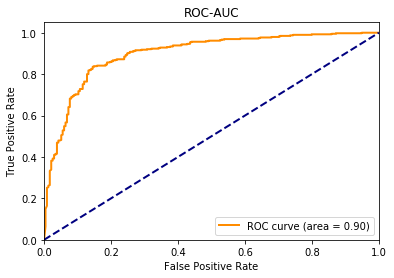

In [24]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC')
plt.legend(loc="lower right")
plt.show()

# Generando más imágenes para balancear la muestra

In [0]:
new_images2=[]
new_labels2=[]
for imagen in X_train[normalindex]:
  new_img = imagen[10:-10,10:-10].copy()
  new_img = cv2.resize(new_img,(200,200))
  new_images2.append(new_img)
  new_labels2.append(0)
  cv2.waitKey(0)

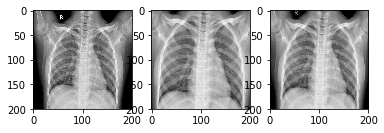

In [155]:
plt.subplot(1,3,1)
plt.imshow(X_train[normalindex][1].reshape(200,200), cmap='gray')
plt.subplot(1,3,2)
plt.imshow(new_images[1].reshape(200,200),cmap='gray')
plt.subplot(1,3,3)
plt.imshow(new_images2[1].reshape(200,200),cmap='gray')
plt.show()

In [156]:
a=X_train_more_data
b=np.array(new_images2).reshape(-1,200,200,1)
c=y_train_more_data
d=np.array(new_labels2)

print(len(a))
print(len(b))
X_train_more_data2 = np.concatenate((a,b),axis=0)
y_train_more_data2 = np.concatenate((c,d),axis=0)
print(len(X_train_more_data2))
print(len(y_train_more_data2))
np.bincount(y_train_more_data2)

6557
1341
7898
7898


array([4023, 3875])

In [157]:
to_shuffle_train2=[]
for i in range(len(X_train_more_data2)):
  to_shuffle_train2.append([X_train_more_data2[i],y_train_more_data2[i]])
print('len:',len(to_shuffle_train2))

len: 7898


In [0]:
random.Random(42).shuffle(to_shuffle_train2)

In [0]:
X_train_more_data2,y_train_more_data2=createxyshuffled(to_shuffle_train2)
X_train_more_data2=np.array(X_train_more_data2).reshape(-1,200,200,1)

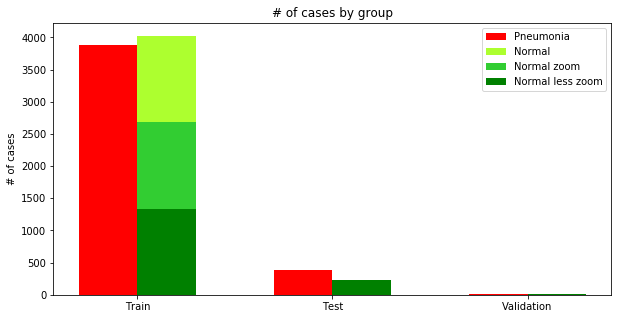

In [141]:
N = 3
normal0=(y_train.count(0),y_test.count(0),y_val.count(0))
normal=(np.bincount(y_train_more_data)[0],y_test.count(0),y_val.count(0))
normal2=(np.bincount(y_train_more_data2)[0],y_test.count(0),y_val.count(0))
pneumonia=(np.bincount(y_train_more_data)[1],y_test.count(1),y_val.count(1))
ind = np.arange(N)    # the x locations for the groups
width = 0.3       # the width of the bars: can also be len(x) sequence
plt.figure(figsize=(10,5))
p1 = plt.bar(ind-0.15, pneumonia, width,color='r')
p2 = plt.bar(ind+0.15, normal2, width, color='greenyellow')
p3 = plt.bar(ind+0.15, normal, width, color='limegreen')
p4 = plt.bar(ind+0.15, normal0, width, color='g')
plt.ylabel('# of cases')
plt.title('# of cases by group')
plt.xticks(ind, ('Train', 'Test', 'Validation'))
plt.yticks(np.arange(0, 4500, 500))
plt.legend((p1[0], p2[0],p3[0],p4[0]), ('Pneumonia','Normal','Normal zoom','Normal less zoom'))

plt.show()

In [0]:
from keras.utils import to_categorical
y_train_binary = to_categorical(y_train)
y_test_binary = to_categorical(y_test)
y_val_binary = to_categorical(y_val)
y_train_more_data2_binary = to_categorical(y_train_more_data2)

In [143]:
model2 = Sequential()
model2.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(200, 200,1), activation='relu'))
model2.add(Conv2D(32,(3,3),activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.2))
model2.add(Conv2D(64, (3,3), activation='relu'))
model2.add(Conv2D(64,(3,3),activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.2))
model2.add(Conv2D(32, (3,3), activation='relu'))
model2.add(Conv2D(32,(3,3),activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.2))
model2.add(Conv2D(64, (3,3), activation='relu'))
model2.add(Conv2D(64,(3,3),activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.2))
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(units=2, activation='softmax'))
model2.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_89 (Conv2D)           (None, 198, 198, 32)      320       
_________________________________________________________________
conv2d_90 (Conv2D)           (None, 196, 196, 32)      9248      
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 98, 98, 32)        0         
_________________________________________________________________
dropout_57 (Dropout)         (None, 98, 98, 32)        0         
_________________________________________________________________
conv2d_91 (Conv2D)           (None, 96, 96, 64)        18496     
_________________________________________________________________
conv2d_92 (Conv2D)           (None, 94, 94, 64)        36928     
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 47, 47, 64)        0         
__________

In [35]:
model2.compile(
    loss='categorical_crossentropy',  # we train 2-way classification
    optimizer=keras.optimizers.Adadelta(),  # for SGD
    metrics=['accuracy'],  # report accuracy during training
)

modeltrain2 = model2.fit(x=X_train_more_data2,y=y_train_more_data2_binary, epochs=30,#,callbacks=[tensorboard])#,
                   validation_split=0.1, batch_size=128,shuffle=True)

Train on 7108 samples, validate on 790 samples
Epoch 1/30
7108/7108 [==============================] - 42s 6ms/step - loss: 0.6934 - acc: 0.5415 - val_loss: 0.6935 - val_acc: 0.5051
Epoch 2/30
7108/7108 [==============================] - 38s 5ms/step - loss: 0.6730 - acc: 0.5837 - val_loss: 0.5645 - val_acc: 0.7633
Epoch 3/30
7108/7108 [==============================] - 38s 5ms/step - loss: 0.5717 - acc: 0.6823 - val_loss: 0.3601 - val_acc: 0.8519
Epoch 4/30
7108/7108 [==============================] - 38s 5ms/step - loss: 0.3601 - acc: 0.8465 - val_loss: 0.3138 - val_acc: 0.9114
Epoch 5/30
7108/7108 [==============================] - 38s 5ms/step - loss: 0.2939 - acc: 0.8811 - val_loss: 0.2052 - val_acc: 0.9342
Epoch 6/30
7108/7108 [==============================] - 38s 5ms/step - loss: 0.2330 - acc: 0.9094 - val_loss: 0.1474 - val_acc: 0.9456
Epoch 7/30
7108/7108 [==============================] - 38s 5ms/step - loss: 0.1949 - acc: 0.9225 - val_loss: 0.1196 - val_acc: 0.9506
Epoch 8/

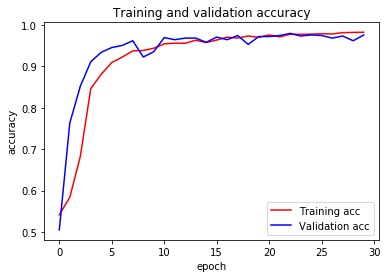

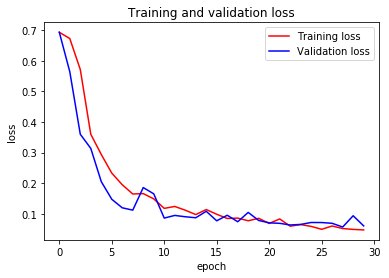

In [36]:
#Graphing our training and validation
acc = modeltrain2.history['acc']
val_acc = modeltrain2.history['val_acc']
loss = modeltrain2.history['loss']
val_loss = modeltrain2.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy') 
plt.xlabel('epoch')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss') 
plt.xlabel('epoch')
plt.legend()
plt.show()

In [37]:
val_loss,val_acc = model2.evaluate(X_test,y_test_binary)
print(val_loss,val_acc)

624/624 [==============================] - 1s 2ms/step
0.6086560823978522 0.8381410256410257


In [0]:
predictions2=model2.predict(X_test)
matrix2 = confusion_matrix(y_test_binary.argmax(axis=1), predictions2.argmax(axis=1))


Normalized confusion matrix


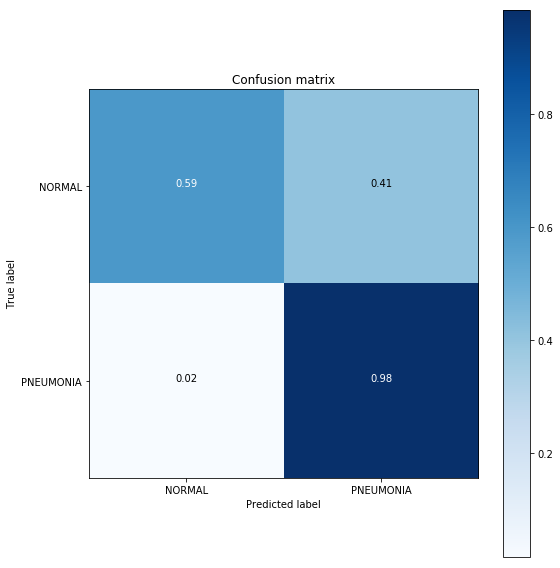

In [39]:
preds2 = np.argmax(model2.predict(X_test), axis = 1)
cm2 = confusion_matrix([np.argmax(i) for i in y_test_binary],preds2)
keys = ['NORMAL','PNEUMONIA']
plt.figure(figsize=(8,8))
plot_confusion_matrix(cm2, keys, normalize=True)

In [0]:
model2.save('cnn-chest-x-ray.h5')

In [176]:
fpr2,tpr2,auc2 =calculate_auc(y_test_binary,predictions2)
f1_2,recall_2,prec_2,auc_2 = calculate_metrics(y_test_binary,predictions2)
print('F1: {}\nRecall: {}\nPrecision: {}\nAUC: {}'.format(f1_2,recall_2,prec_2,auc_2))

F1: 0.8837744533947065
Recall: 0.9846153846153847
Precision: 0.8016701461377871
AUC: 0.8599441157133465


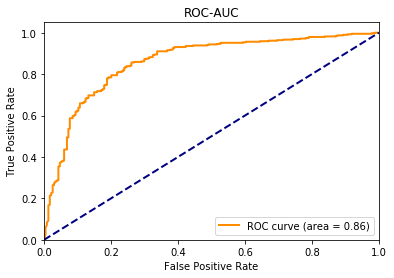

In [41]:
plt.figure()
lw = 2
plt.plot(fpr2, tpr2, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc2)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC')
plt.legend(loc="lower right")
plt.show();

# Probando cambios en el último modelo

In [161]:
model3 = Sequential()
model3.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(200, 200,1), activation='relu'))
model3.add(Conv2D(32,(3,3),activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.2))
model3.add(Conv2D(64, (3,3), activation='relu'))
model3.add(Conv2D(64,(3,3),activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.2))
model3.add(Conv2D(32, (3,3), activation='relu'))
model3.add(Conv2D(32,(3,3),activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.2))
model3.add(Conv2D(64, (3,3), activation='relu'))
model3.add(Conv2D(64,(3,3),activation='relu'))
#model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.2))
#model3.add(Conv2D(32, (3,3), activation='relu'))
#model3.add(Conv2D(32,(3,3),activation='relu'))
#model3.add(MaxPooling2D(pool_size=(2, 2)))
#model3.add(Dropout(0.2))
model3.add(Flatten())
model3.add(Dense(128, activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(units=2, activation='softmax'))
model3.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_105 (Conv2D)          (None, 198, 198, 32)      320       
_________________________________________________________________
conv2d_106 (Conv2D)          (None, 196, 196, 32)      9248      
_________________________________________________________________
max_pooling2d_51 (MaxPooling (None, 98, 98, 32)        0         
_________________________________________________________________
dropout_67 (Dropout)         (None, 98, 98, 32)        0         
_________________________________________________________________
conv2d_107 (Conv2D)          (None, 96, 96, 64)        18496     
_________________________________________________________________
conv2d_108 (Conv2D)          (None, 94, 94, 64)        36928     
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 47, 47, 64)        0         
__________

In [162]:
model3.compile(
    loss='categorical_crossentropy',  # we train 2-way classification
    optimizer=keras.optimizers.Adadelta(),  # for SGD
    metrics=['accuracy'],  # report accuracy during training
)

modeltrain3 = model3.fit(x=X_train_more_data2,y=y_train_more_data2_binary, epochs=20,#,callbacks=[tensorboard])#,
                   validation_split=0.1, batch_size=128,shuffle=True)

Train on 7108 samples, validate on 790 samples
Epoch 1/20
7108/7108 [==============================] - 41s 6ms/step - loss: 0.6882 - acc: 0.5713 - val_loss: 0.6458 - val_acc: 0.5684
Epoch 2/20
7108/7108 [==============================] - 38s 5ms/step - loss: 0.5203 - acc: 0.7738 - val_loss: 0.3074 - val_acc: 0.8684
Epoch 3/20
7108/7108 [==============================] - 39s 5ms/step - loss: 0.3389 - acc: 0.8620 - val_loss: 0.2378 - val_acc: 0.9051
Epoch 4/20
7108/7108 [==============================] - 39s 5ms/step - loss: 0.2377 - acc: 0.9100 - val_loss: 1.2923 - val_acc: 0.4949
Epoch 5/20
7108/7108 [==============================] - 38s 5ms/step - loss: 0.2279 - acc: 0.9115 - val_loss: 0.1566 - val_acc: 0.9430
Epoch 6/20
7108/7108 [==============================] - 38s 5ms/step - loss: 0.1703 - acc: 0.9356 - val_loss: 0.1145 - val_acc: 0.9557
Epoch 7/20
7108/7108 [==============================] - 38s 5ms/step - loss: 0.1413 - acc: 0.9472 - val_loss: 0.4565 - val_acc: 0.8367
Epoch 8/

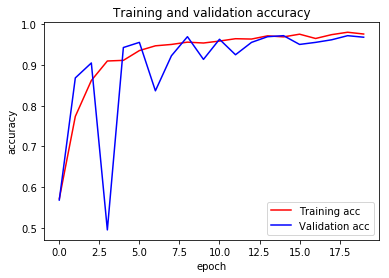

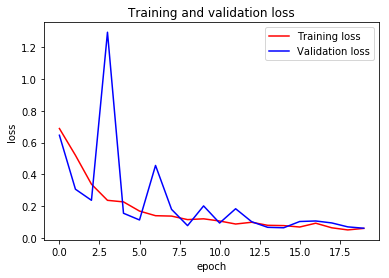

In [164]:
#Graphing our training and validation
acc = modeltrain3.history['acc']
val_acc = modeltrain3.history['val_acc']
loss = modeltrain3.history['loss']
val_loss = modeltrain3.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy') 
plt.xlabel('epoch')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss') 
plt.xlabel('epoch')
plt.legend()
plt.show()

In [165]:
val_loss,val_acc = model3.evaluate(X_test,y_test_binary)
print(val_loss,val_acc)

624/624 [==============================] - 1s 2ms/step
0.8458675574033688 0.8157051282051282


In [0]:
predictions3=model3.predict(X_test)
matrix3 = confusion_matrix(y_test_binary.argmax(axis=1), predictions3.argmax(axis=1))


Normalized confusion matrix


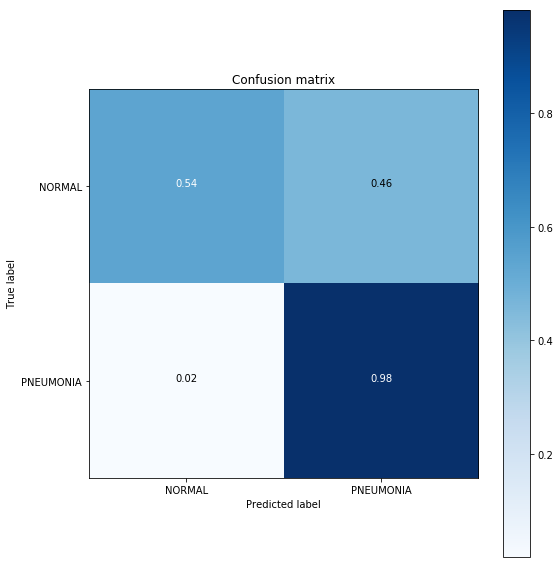

In [167]:
preds3 = np.argmax(model3.predict(X_test), axis = 1)
cm3 = confusion_matrix([np.argmax(i) for i in y_test_binary],preds3)
keys = ['NORMAL','PNEUMONIA']
plt.figure(figsize=(8,8))
plot_confusion_matrix(cm3, keys, normalize=True)

In [168]:
fpr3,tpr3,auc3 =calculate_auc(y_test_binary,predictions3)
f1_3,recall_3,prec_3,auc_3 = calculate_metrics(y_test_binary,predictions3)
print('F1: {}\nRecall: {}\nPrecision: {}\nAUC: {}'.format(f1_3,recall_3,prec_3,auc_3))

F1: 0.8009097600880841
Recall: 0.8157051282051282
Precision: 0.8427886161432093
AUC: 0.9054733727810651


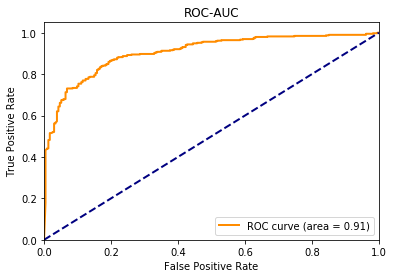

In [169]:
plt.figure()
lw = 2
plt.plot(fpr3, tpr3, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc3)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC')
plt.legend(loc="lower right")
plt.show();

In [175]:

f1,recall,precicion,auc = calculate_metrics(y_test_binary,predictions3)
f1_3,recall_3,prec_3,auc_3 = calculate_metrics(y_test_binary,predictions3)
print('F1: {}\nRecall: {}\nPrecision: {}\nAUC: {}'.format(f1_3,recall_3,prec_3,auc_3))

F1: 0.869466515323496
Recall: 0.982051282051282
Precision: 0.780040733197556
AUC: 0.9054733727810651


In [107]:
y_true = [0, 1, 2, 0, 1, 2]
y_pred = [0, 2, 1, 0, 0, 1]
f1_score(y_true, y_pred, average=None) 

array([0.8, 0. , 0. ])

# Cargando modelo desde H5...

In [0]:
load=load_model('/content/cnn-chest-x-ray.h5')

In [179]:
load.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 198, 198, 32)      320       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 196, 196, 32)      9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 98, 98, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 98, 98, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 96, 96, 64)        18496     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 94, 94, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 47, 47, 64)        0         
__________

In [180]:
load.evaluate(X_test,y_test_binary)


624/624 [==============================] - 2s 3ms/step


[0.6086560823978522, 0.8381410256410257]

In [0]:
predictions_loaded=load.predict(X_test)
matrix_loaded = confusion_matrix(y_test_binary.argmax(axis=1), predictions_loaded.argmax(axis=1))

Normalized confusion matrix


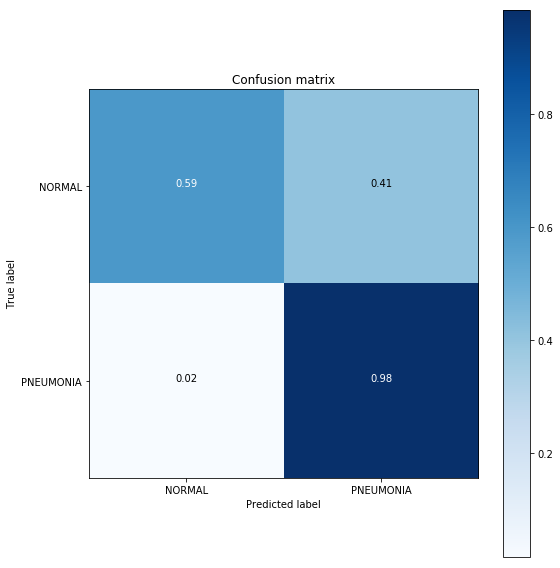

In [182]:
preds_loaded = np.argmax(load.predict(X_test), axis = 1)
cm_loaded = confusion_matrix([np.argmax(i) for i in y_test_binary],preds_loaded)
keys = ['NORMAL','PNEUMONIA']
plt.figure(figsize=(8,8))
plot_confusion_matrix(cm_loaded, keys, normalize=True)

In [0]:
def load_new_image(list_data_dir,IMG_SIZE):
  categories = ['NORMAL', 'PNEUMONIA']
  img_list=[]
  for datadir in list_data_dir:
    img_array = cv2.imread(datadir, cv2.IMREAD_GRAYSCALE)   # resizes the original image to a IMG_SIZE
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))    # resizes the original image to a IMG_SIZE
    datadir=datadir.split('/')
    class_num=categories.index(datadir[-2])     # Set category by index in categories: 0 -> Normal, 1 -> Pneumonia
    img_list.append([new_array,class_num])              # Appends to the list a tuple with array resized and each label 
  X,y = createxy(img_list)
  X = np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,1)
  y = to_categorical(y)
  return X,y
  

img1='/content/drive/My Drive/chest_xray/val/NORMAL/NORMAL2-IM-1431-0001.jpeg'  
img2='/content/drive/My Drive/chest_xray/val/NORMAL/NORMAL2-IM-1437-0001.jpeg'
img='/content/drive/My Drive/chest_xray/val/NORMAL/NORMAL2-IM-1442-0001.jpeg'
imgtest='/content/drive/My Drive/chest_xray/test/NORMAL/IM-0006-0001.jpeg'
img3='/content/drive/My Drive/chest_xray/val/PNEUMONIA/person1952_bacteria_4883.jpeg'
img4='/content/drive/My Drive/chest_xray/val/PNEUMONIA/person1954_bacteria_4886.jpeg'

X_new,y_new = load_new_image([img1,img2,img,imgtest,img3,img4],200)  


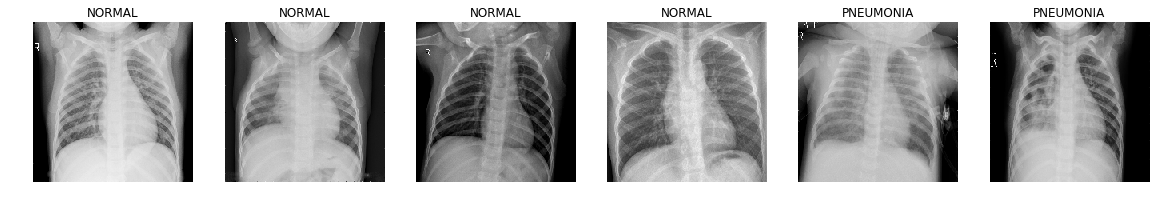

In [262]:
dic={0:'NORMAL',1:'PNEUMONIA'}
plt.figure(figsize=(20,12))
for index,img in enumerate(X_new):  
    plt.subplot(1,6,index+1)
    plt.imshow(img.reshape(200,200), cmap='gray')
    plt.axis('off')
    plt.title(dic.get(y_new[index][1]))
plt.show()

In [0]:
new_predictions=load.predict(X_new)
matrix_loaded = confusion_matrix(y_new.argmax(axis=1), new_predictions.argmax(axis=1))

In [264]:
[np.argmax(new_predictions[i]) for i in range(len(new_predictions))]

[0, 0, 0, 0, 0, 1]

In [241]:
new_predictions

array([[0.79988164, 0.20011836],
       [0.97115433, 0.02884567],
       [0.09772086, 0.90227914],
       [0.01397584, 0.9860241 ],
       [0.02565069, 0.9743493 ]], dtype=float32)